# Регрессия 
это процесс оценки того, как соотносятся между собой входные
и выходные переменные. Следует отметить, что выходные переменные
могут иметь значения из непрерывною ряда вещественных чисел. Следовательно,
существует бесконечное количество результирующих возможностей.
Эго резко контрастирует с процессом классификации, в котором количество
выходных классов фиксировано.
В регрессии предполагается, что выходные переменные зависят от входных,
и наша задача заключается в выяснении соотношения между ними.
Отсюда входные переменные называют независимыми переменными (или предиктора.
ми), а выходные - зависимыми (или критериальными переменными).
При этом вовсе не требуется, чтобы входные переменные были независимыми
друг от друга. Существует множество сюуаций, когда между входными
переменными существует корреляция.
Регрессионный анализ позволяет выяснить, как изменяется значение выходной
переменной, когда мы изменяем лишь часть входных переменных,
оставляя остальные входные переменные фиксированными. В случае линейной
регрессии предполагается, что входные и выходные переменные связаны
между собой линейной зависимостью. Эго налагает ограничения на нашу
процедуру моделирования, но ускоряет ее и делает более эффективной.
Иногда линейной регрессии оказывается недостаточно для объяснения соотношений
между входными и выходными переменными. В подобных случаях
мы используем по11иномиальную регрессию, в которой входные и
выходные переменные связаны между собой полиномиальной зависимостью.
С вычислительной точки зрения такой подход более сложен, но обеспечивает
более высокую точность.

In [2]:
# создание регрессора одной переменной 
import pickle 

import numpy as np 

from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [3]:
input_file = 'data_singlevar_regr.txt'

В этом текстовом файле в качестве разделителя используется запятая,
поэтому для загрузки данных можно воспользоваться следующим вызовом
функции.

In [4]:
data = np.loadtxt(input_file, delimiter=',') #в файле разделитель - ,
X, y = data[:, :-1], data[:, -1]

Разобьем данные на обучающий и тестовый набор


In [5]:
# еще один способ
num_training = int(0.8 * len(X))
num_test = len(X) - num_training
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [8]:
# predict
y_test_pred = regressor.predict(X_test)

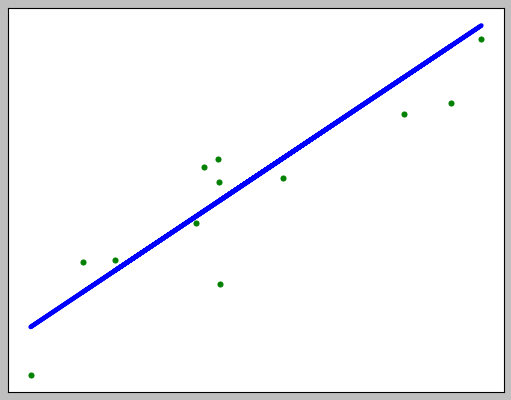

In [13]:
#plot
plt.style.use('classic')
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, y_test_pred, linewidth = 4)
plt.xticks(())
plt.yticks(())
plt.show()

In [15]:
# метрические характеристики 
print("linear regressor perfomance:")
print("Mean absolute error=", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Median absolutle error =", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("explain variance score=", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

linear regressor perfomance:
Mean absolute error= 0.71
Median absolutle error = 0.68
explain variance score= 0.8
R2 score = 0.79


In [16]:
# сохраним модель 
out_model_file = 'model.pkl'

with open(out_model_file, 'wb') as f:
    pickle.dump(regressor, f)
    

In [17]:
# попробуем загрузить и протестировать модель 
with open(out_model_file, 'rb') as f:
    regressor_model = pickle.load(f)

In [18]:
# используем для прогноза на тестовых данных
y_test_pred_new = regressor_model.predict(X_test)
print("\n New mean absolutle error = ", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))


 New mean absolutle error =  0.71
